In [4]:
# All imported Library 
import tensorflow as tf
from keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_dir =r'E:\Lacture\Mini Project\dataset\train'
data_val =r'E:\Lacture\Mini Project\dataset\test'
batch_size=10

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir,
                                                                validation_split=0.1, #is it required if I'm gonna use the whole folders and files for training?
                                                                subset="training",
                                                                seed=123,
                                                                image_size=(200,200),
                                                                batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_val,
                                                              validation_split=0.4, #need to check
                                                              subset="validation",
                                                              seed=455,
                                                              image_size=(200,200),
                                                              batch_size=batch_size)


num_classes = 14

fruit_defector = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(200,200, 3)),
  
  layers.Conv2D(16, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  
  layers.Conv2D(32, 3, padding='same', activation='tanh'),  #from renu
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.3),             #prevent overfitting        

  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

fruit_defector.compile(optimizer='adam', #adam
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fruit_defector.summary()

epochs=3
history = fruit_defector.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Found 10901 files belonging to 6 classes.
Using 9811 files for training.
Found 2698 files belonging to 6 classes.
Using 1079 files for validation.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                     

1/1 [==============================] - 0s 243ms/step
['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
Fruit is rotten, and fruit is banana


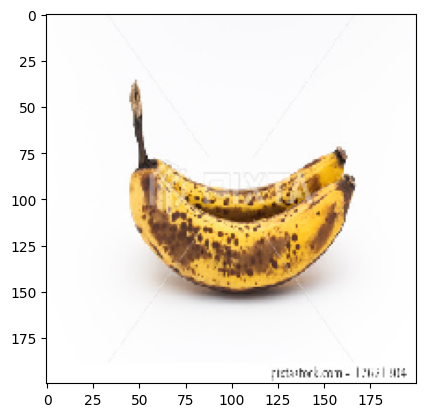

In [10]:
dir_path=(r'E:\Lacture\Mini Project\new image\4.jpg')
img=image.load_img(dir_path,target_size=(200,200))
#for i in os.listdir(dir_path):
#img=image.load_img(dir_path+'//'+i,target_size=(200,200))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=fruit_defector.predict(images)
val=(val.argmax())
print(val_ds.class_names)
plt.imshow(img)
if val==0:
    print("Fruit is fresh, and fruit is apple")
elif val==1:
    print("Fruit is fresh, and fruit is banana")
elif val==2:
    print("Fruit is fresh, and fruit is orange")
elif val==3:
    print("Fruit is rotten, and fruit is apple")
elif val==4:
    print("Fruit is rotten, and fruit is banana")
elif val==5:
    print("Fruit is rotten, and fruit is orange")

In [8]:
# serialize model to JSON
model_json = fruit_defector.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
fruit_defector.save_weights("model.h5")


In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")